This notebook contains a workflow to calculate predictions for Mean Major GPA's using an autoregression model

Some of the work in this notebook is getting the data in the right format. Scroll to the next bolded header if you are interested in seeing how the AR model works.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

grades_final = pd.read_csv('new_grades_statistics')

grades_final['date'] =  pd.to_datetime(grades_final['date'])




In [2]:
probability_lists = []

for i in range(46191):
    if i == 0:
        probability_lists.append(grades_final['probability'][:8].values)
    else:
        probability_lists.append(grades_final['probability'][i * 8:8 * (i+1)].values)
        


In [3]:
grades_final['gpa_grade_values'] = [[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]] * len(grades_final)

In [4]:
grades_final = grades_final.drop_duplicates('unique_course_name')


In [5]:
grades_final["probability_lists"] = probability_lists

In [6]:
grades_final = grades_final.reset_index()

grades_final = grades_final.drop('index', axis = 1)

#grades_final = grades_final.drop(['probability', 'count', 'level_0'], axis = 1)


In [7]:
# J. Sheehan


mask = grades_final['total_grades'] > 15
masked = grades_final[mask]
refined_data = masked.sort_values('date')
refined_data = refined_data.reset_index()
probability = refined_data['probability_lists']
total_grades = refined_data['total_grades']
fail = [] 
perfect = []
step = 0
for plist in probability_lists:
    four = plist[0]
    fails = plist[-1]+plist[-2]+plist[-3]
    fail.append(fails)
    perfect.append(four)
print(len(fail))
print(len(perfect))
refined_data

46191
46191


,index,date,unique_course_name,semester,subject_code,course_title,instructors,total_grades,course_name,letter_grade,count,probability,mean,mode,median,skew,std,kurt,gpa_grade_values,probability_lists
0,19685,2011-12-15,IAH_241F__FS11___KENNETH W HARROW,FS11,IAH,Traditions in World Art (I),KENNETH W HARROW,17,IAH_241F,4.0,4,0.235294,2.911765,4.0,3.0,-1.343977,1.046497,4.479081,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.2352941176470588, 0.17647058823529413, 0.23..."
1,17608,2011-12-15,HST_150__FS11___ALAN FISHER,FS11,HST,World History since 1500,ALAN FISHER,103,HST_150,4.0,64,0.621359,3.373786,4.0,4.0,-1.886025,1.046767,5.942200,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.6213592233009708, 0.07766990291262135, 0.09..."
2,26008,2011-12-15,ME_444__FS11___HAROLD J SCHOCK,FS11,ME,Automotive Engines,HAROLD J SCHOCK,45,ME_444,4.0,14,0.311111,3.155556,4.0,3.0,-1.314641,0.794580,6.310216,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.3111111111111111, 0.13333333333333333, 0.28..."
3,22615,2011-12-15,KIN_250__FS11___V D ULIBARRI,FS11,KIN,Measurement in Kinesiology,V D ULIBARRI,172,KIN_250,4.0,14,0.081395,2.110465,2.5,2.5,-0.328462,1.201746,2.195153,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.08139534883720931, 0.11046511627906977, 0.1..."
4,43366,2011-12-15,THR_350__FS11___RYAN J DAVIES | ROBERT J ROZNO...,FS11,THR,Plays as Film,RYAN J DAVIES | ROBERT J ROZNOWSKI,62,THR_350,4.0,30,0.483871,3.322581,4.0,3.5,-1.467246,0.875734,5.113766,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.4838709677419355, 0.14516129032258066, 0.14..."
5,8974,2011-12-15,CSS_442__FS11___PHIL ROBERTSON,FS11,CSS,Agricultural Ecology,PHIL ROBERTSON,27,CSS_442,4.0,9,0.333333,3.555556,3.5,3.5,-0.656195,0.392837,3.069600,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.3333333333333333, 0.4814814814814815, 0.148..."
6,43358,2011-12-15,THR_341__FS11___MARK W COLSON,FS11,THR,Beginning Play Directing,MARK W COLSON,23,THR_341,4.0,19,0.826087,3.804348,4.0,4.0,-3.993630,0.620994,18.097841,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.8260869565217391, 0.13043478260869565, 0.0,..."
7,39981,2011-12-15,STT_886__FS11___ANITA D BEHME,FS11,STT,Stochastic Processes & App,ANITA D BEHME,34,STT_886,4.0,17,0.500000,3.647059,4.0,4.0,-0.569971,0.393503,1.834556,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.5, 0.29411764705882354, 0.2058823529411765,..."
8,34823,2011-12-15,PLS_324__FS11___DANIEL J LEE,FS11,PLS,American Legislative Process,DANIEL J LEE,73,PLS_324,4.0,16,0.219178,3.068493,3.0,3.0,-1.149045,0.799465,4.868322,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.2191780821917808, 0.2191780821917808, 0.301..."
9,31560,2011-12-15,MUS_873__FS11___CHARLES H RUGGIERO | LEIGH A V...,FS11,MUS,Early 20th Century Techniques,CHARLES H RUGGIERO | LEIGH A VANHANDEL,20,MUS_873,4.0,7,0.350000,3.425000,4.0,3.5,-0.804608,0.553963,3.070989,"[4, 3.5, 3, 2.5, 2, 1.5, 1, 0]","[0.35, 0.3, 0.25, 0.05, 0.05, 0.0, 0.0, 0.0]"


In [8]:
grouped = refined_data.groupby(['subject_code','date','instructors'])
means = grouped['mean'].describe()

In [9]:
subject_code_list = ['AAAS', 'AAE', 'ABM', 'ACC', 'ACM', 'ACR', 'ADV', 'AEC', 'AESC',
       'AE', 'AFRE', 'AIIS', 'AL', 'AMS', 'ANP', 'ANR', 'ANS',
       'ANTR', 'ARB', 'ASN', 'AST', 'AS', 'ATD', 'AT', 'BE', 'BLD', 'BMB',
       'BME', 'BS', 'BUS', 'CAS', 'CEM', 'CEP', 'CE', 'CHE', 'CHS', 'CJ',
       'CLA', 'CLS', 'CMP', 'CMSE', 'COM', 'CSD', 'CSE', 'CSS', 'CSUS',
       'DAN', 'EAD', 'ECE', 'ECSP', 'EC', 'ED', 'EEM', 'EEP', 'EGR',
       'ENE', 'ENG', 'ENT', 'EPI', 'ESA', 'ESL', 'ESP', 'FIM', 'FI',
       'FLM', 'FLT', 'FOR', 'FRN', 'FSC', 'FW', 'GBL', 'GD',
       'GEO', 'GLG', 'GRM', 'GSAH', 'HA', 'HB', 'HDFS', 'HEB', 'HM',
       'HNF', 'HRLR', 'HRT', 'HST', 'IAH', 'IBIO', 'IDES', 'IM', 'ISB',
       'ISE', 'ISP', 'ISS', 'ITL', 'ITM', 'JPN', 'JRN', 'KIN', 'KOR',
       'LA', 'LB', 'LCS', 'LIN', 'LIR', 'LLT', 'LL', 'LTN', 'MBA', 'MC',
       'ME', 'MGT', 'MI', 'MKT', 'MMG', 'MSE', 'MS', 'MTHE', 'MTH',
       'MUSM', 'MUS', 'NEU', 'NOP', 'NSC', 'NUR', 'OST', 'PDC', 'PDI',
       'PHL', 'PHM', 'PHY', 'PIM', 'PKG', 'PLB', 'PLP', 'PLS', 'PPL',
       'PRR', 'PRT', 'PSL', 'PSY', 'RAD', 'RCAH', 'REL', 'RET',
       'RUS', 'SCM', 'SCS', 'SME', 'SOC', 'SPN', 'SSC', 'STA', 'STT',
       'SW', 'TC', 'TE', 'THR', 'TSM', 'UGS', 'UP', 'VM', 'WRA', 'WS', 'ZOL']

In [10]:
df_course_list = []
for course_code in subject_code_list:    
    test = means.loc[str(course_code)]
    dates = []
    #for i in test.index[0]:
    for i in range(len(test)):
        indeces = test.index[i][0]
        dates.append(indeces)
    df = pd.DataFrame({'dates':dates,'mean':test['mean'], 'course': course_code})
    df_course_list.append(df)



In [11]:
df_course_list_grouped = []
for i in df_course_list:
    df_course_list_grouped.append(i.groupby(['date', 'course']).mean().reset_index())
    


In [12]:
# creating dictinoary of all subject codes and grouped dataframe

df_dict_course_means = dict(zip(subject_code_list, df_course_list_grouped))


In [13]:
# retreiving group names for indexing later 

course_list_names = []
    
for i in df_dict_course_means:    
    course_list_names.append(i)

In [14]:
# indexing dictionary for courses that have most recent date as well as greater than 20 observations


df_updated_dict_course_means = []
success_course_list = []
for i in course_list_names:
    intermedate_dict_major = df_dict_course_means[str(i)]
    if df_dict_course_means[str(i)]['date'].values[-1] == np.datetime64('2018-12-15T00:00:00.000000000') and len(intermedate_dict_major['date'].values) >= 20:
        df_updated_dict_course_means.append(intermedate_dict_major)
        success_course_list.append(i)
        
df_updated_dict_course_means
success_course_list

df_dict_course_means = dict(zip(success_course_list, df_updated_dict_course_means))




## Auto regression model FINAL

In the cells below, the function ar_msu_grade calculates the partial autocorrelation function plot to determine which lags are signifigant. The function also allows you to calculate future predictions. The function then plots the future predictions vs actual predictions.

/Users/austinader/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


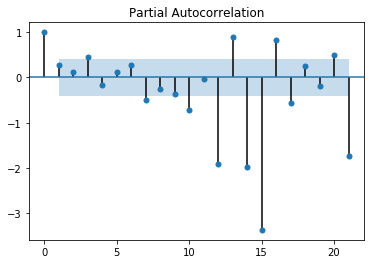

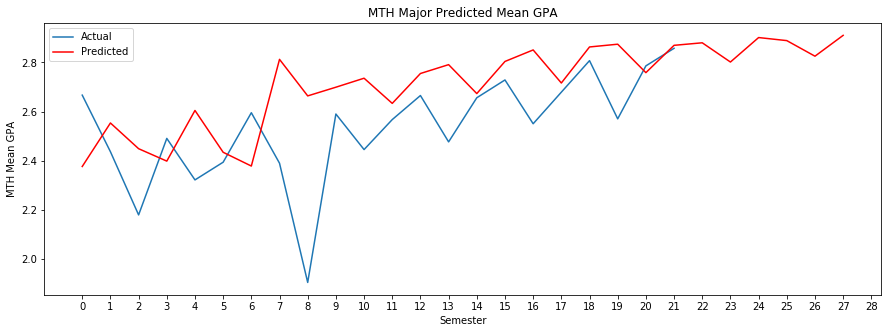

In [25]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import statsmodels.graphics.tsaplots

np.random.seed()

def ar_msu_grade(course_code = 'MTH', number_future_predic = 35):
    '''This function's input is a major code, the output is an auto correlation function plot,
    along with the root square error, optimal lag, and p-value associated with each coefficiencts.'''
   
    # returning auto correlation function
    
    course_model_test = df_dict_course_means[course_code].iloc[:,[2]].values.flatten()

    course_dates_test = df_dict_course_means[course_code].iloc[:,[0]].values.flatten()
    
    plot_part_auto_corr = statsmodels.graphics.tsaplots.plot_pacf(course_model_test)
    
    
    
    model = AR(course_model_test)
    
    model_fit = model.fit()
    
    
    pvalues = model_fit.pvalues

    
    # calculating train predictions for error rate
    
    train_predictions = model_fit.predict(start = model_fit.k_ar, end = len(course_model_test) + model_fit.k_ar - 1)

    
    error = mean_squared_error(course_model_test, train_predictions)
    
    root_mse = np.sqrt(error)
    
    
    
    # predicting new course_grades
    
    
    new_predictions = model_fit.predict(start = model_fit.k_ar, end = number_future_predic)
    
    
    
    fig = plt.figure(figsize= (15,5))
    plt.plot(course_model_test, label = "Actual", linestyle = "-")

    plt.plot(new_predictions, color='red', label = 'Predicted')
    plt.title(course_code + ' Major Predicted Mean GPA')
    plt.xlabel('Semester')
    plt.ylabel(course_code + ' Mean GPA')
    plt.xticks(np.arange(0, len(new_predictions) + 1 , 1.0))
    #plt.yticks(np.arange(min(min(new_predictions), min(course_model_test)), max(max(new_predictions), max(course_model_test)), .09))
    #plt.axhline(new_predictions[-1], color = 'y', linestyle = "dashed")

    #plt.axhline(course_model_test[-1], color = 'g', linestyle = "dashed")

    plt.legend()

    #plt.savefig("MTH Predict")
    
    
    
    
    
    
    return course_model_test, plot_part_auto_corr, root_mse, new_predictions, pvalues, fig
    
mth_original_vals, mth_plot_auto_corr, mth_root_mse, mth_new_predic, mth_pval, mth_plot = ar_msu_grade("MTH")



In [34]:
mth_plot_auto_corr.savefig('MTH auto corr.png')

/Users/austinader/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


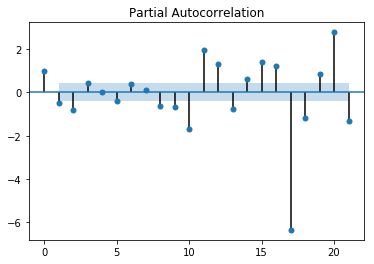

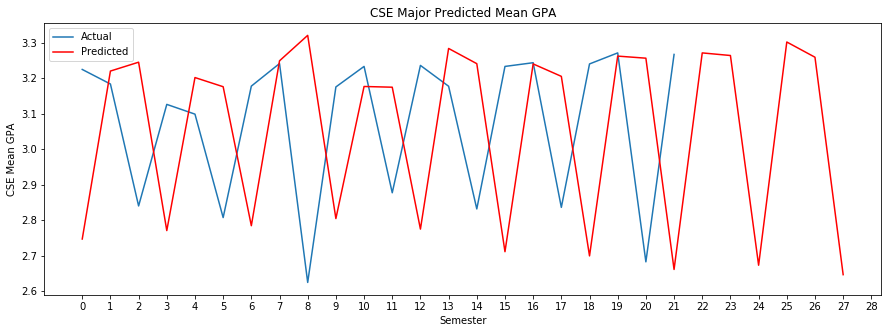

In [17]:
cse_original_vals, cse_plot_auto_corr, cse_root_mse, cse_new_predic, cse_pval, cse_plot = ar_msu_grade("CSE")


In [18]:
cse_plot.savefig('CSE Predict.png')

/Users/austinader/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


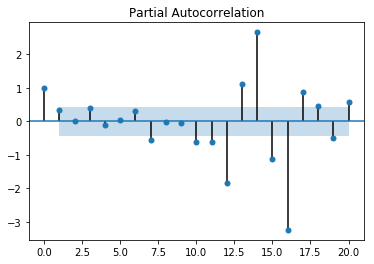

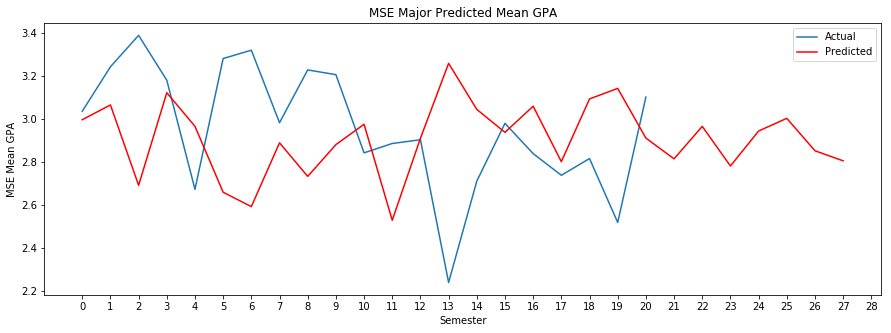

In [33]:
mse_original_vals, mse_plot_auto_corr, mse_root_mse, mse_new_predic, mse_pval, mse_plot = ar_msu_grade("MSE")

mse_plot.savefig('MSE Predict.png')
mse_plot_auto_corr.savefig('MSE auto cor.png')